In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def create_missing_table(input_dataframe: pd.DataFrame):
    total = len(input_dataframe)
    naCount = input_dataframe.isnull().sum()
    zeroCount = len(input_dataframe) - input_dataframe.fillna(1).astype(bool).sum()
    zeroPercent = (zeroCount/len(input_dataframe)*100).round().map(lambda n: '{0:.1f} %'.format(n))
    naPercent = (input_dataframe.isnull().sum()/len(input_dataframe)*100).round().map(lambda n: '{0:.1f} %'.format(n))
    uniqCount = input_dataframe.nunique()
    hitRate = (input_dataframe.notnull().sum()/len(input_dataframe)*100).round().map(lambda n: '{0:.1f} %'.format(n))
    return pd.DataFrame({'count_total': total, 'count_unique': uniqCount, 'count_zero':zeroCount,'percentile_zero':zeroPercent, 'count_missing': naCount,'percentile_missing':naPercent, 'hit_rate':hitRate})

In [7]:
def describe_numeric_table(column, n_round=2, short=False):
    """
    Return DataFrame have original Column.
    Row is count, mean, std, min, 0%, 1%, ...
    :param column: Series or Dataframe
    :param n_round: floating point
    :return: DataFrame
    """
    if short:
        result_df = column.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.75, 0.9, 0.95, 0.99]).round(n_round)
    else:
        result_df = column.describe(percentiles=[i * 0.05 for i in range(20)] + [0.01] + [0.99]).round(n_round)
    return result_df


def describe_category_table(column):
    """

    :param column: pandas Series
    :return: DataFrame row: categories, columns: counts, percentiles(%)
    """
    c = column.value_counts()
    p = column.value_counts(normalize=True).map(lambda n: '{0:.2f} %'.format(n * 100))
    result = pd.concat([c, p], axis=1, keys=['counts', 'percentiles(%)'])

    # make sure index are text, and sort
    result = result.sort_index(na_position="last")
    result.index = result.index.astype("str")
    return result

In [91]:
def describe_category(dataframe, column_name):
    """
    """
    value_count = df_train[column_name].value_counts().sort_index()
    df_value_count = pd.DataFrame({column_name: value_count.index, "count": value_count.values})
    sum_class = df_value_count["count"].sum()
    df_value_count["percentage"] = df_value_count["count"]/sum_class*100
    display(df_value_count)
    
    # fig, ax = plt.subplots(figsize = (1,7)
    ax = sns.barplot(data=df_value_count, x=column_name, y="count")
    ax.set_ylim(0, df_value_count["count"].max()*1.2)
    for p, percentage in zip(ax.patches, list(df_value_count["percentage"])):
        ax.annotate("%.2f" % percentage +" %", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical bars


# Load data

In [4]:
df_train = pd.read_csv("../data/train.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Missing

In [12]:
missing_table = create_missing_table(df_train)
display(missing_table)

,count_total,count_unique,count_zero,percentile_zero,count_missing,percentile_missing,hit_rate
PassengerId,100000,100000,1,0.0 %,0,0.0 %,100.0 %
Survived,100000,2,57226,57.0 %,0,0.0 %,100.0 %
Pclass,100000,3,0,0.0 %,0,0.0 %,100.0 %
Name,100000,92144,0,0.0 %,0,0.0 %,100.0 %
Sex,100000,2,0,0.0 %,0,0.0 %,100.0 %
Age,100000,173,0,0.0 %,3292,3.0 %,97.0 %
SibSp,100000,7,73308,73.0 %,0,0.0 %,100.0 %
Parch,100000,8,73540,74.0 %,0,0.0 %,100.0 %
Ticket,100000,75331,0,0.0 %,4623,5.0 %,95.0 %
Fare,100000,15935,0,0.0 %,134,0.0 %,100.0 %


In [14]:
# sns.barplot(missing_table)

# 1D

## Pclass 

In [76]:
aaa = describe_category_table(df_train["Pclass"])
aaa

,counts,percentiles(%)
1,30315,30.31 %
2,28679,28.68 %
3,41006,41.01 %


<AxesSubplot:ylabel='counts'>

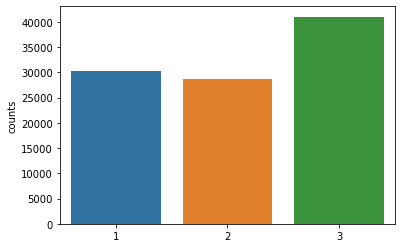

In [77]:
sns.barplot(data=aaa, x=aaa.index, y="counts")

In [33]:
pclass_value_count = df_train["Pclass"].value_counts().sort_index()
df_pclass_value_count = pd.DataFrame({"Pclass": pclass_value_count.index, "count": pclass_value_count.values})
sum_pclass = df_pclass_value_count["count"].sum()
df_pclass_value_count["percentage"] = df_pclass_value_count["count"]/sum_pclass*100
display(df_pclass_value_count)

,Pclass,count,percentage
0,1,30315,30.315
1,2,28679,28.679
2,3,41006,41.006


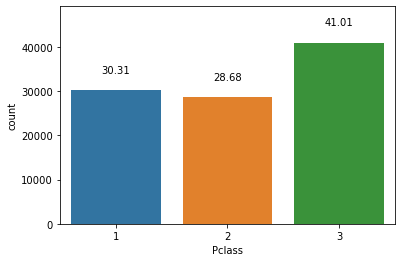

In [67]:
# fig, ax = plt.subplots(figsize = (1,7)
ax = sns.barplot(data=df_pclass_value_count, x="Pclass", y="count")
ax.set_ylim(0, df_pclass_value_count["count"].max()*1.2)
for p, percentage in zip(ax.patches, list(df_pclass_value_count["percentage"])):
    ax.annotate("%.2f" % percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical bars
    # print(p.get_height())

/home/tt/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

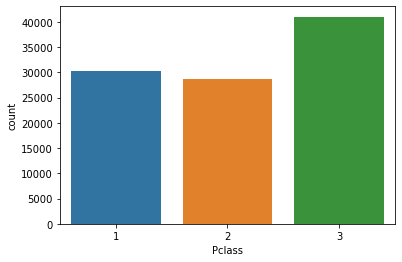

In [69]:
# sns.countplot(df_train["Pclass"], )

,Pclass,count,percentage
0,1,30315,30.315
1,2,28679,28.679
2,3,41006,41.006


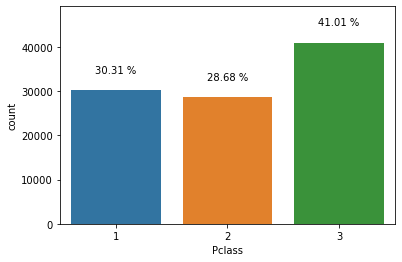

In [93]:
describe_category(df_train, "Pclass")

,Sex,count,percentage
0,female,43886,43.886
1,male,56114,56.114


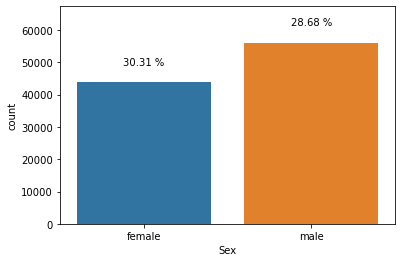

In [92]:
describe_category(df_train, "Sex")

,Parch,count,percentage
0,0,73540,73.540
1,1,12996,12.996
2,2,11236,11.236
3,3,983,0.983
4,4,446,0.446
5,5,331,0.331
6,6,204,0.204
7,9,264,0.264


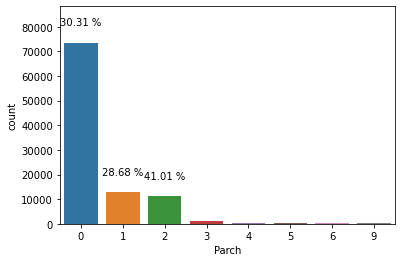

In [97]:
describe_category(df_train, "Parch")

,SibSp,count,percentage
0,0,73308,73.308
1,1,19758,19.758
2,2,3703,3.703
3,3,1635,1.635
4,4,1168,1.168
5,5,132,0.132
6,8,296,0.296


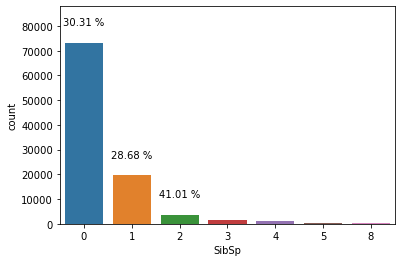

In [96]:
describe_category(df_train, "SibSp")


,Survived,count,percentage
0,0,57226,57.226
1,1,42774,42.774


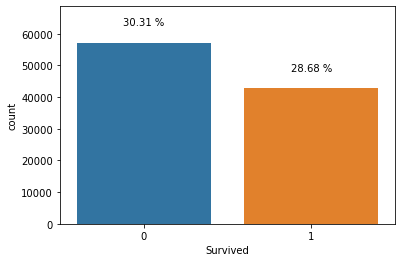

In [102]:
describe_category(df_train, "Survived")


# 2D

In [103]:
## vs Survive

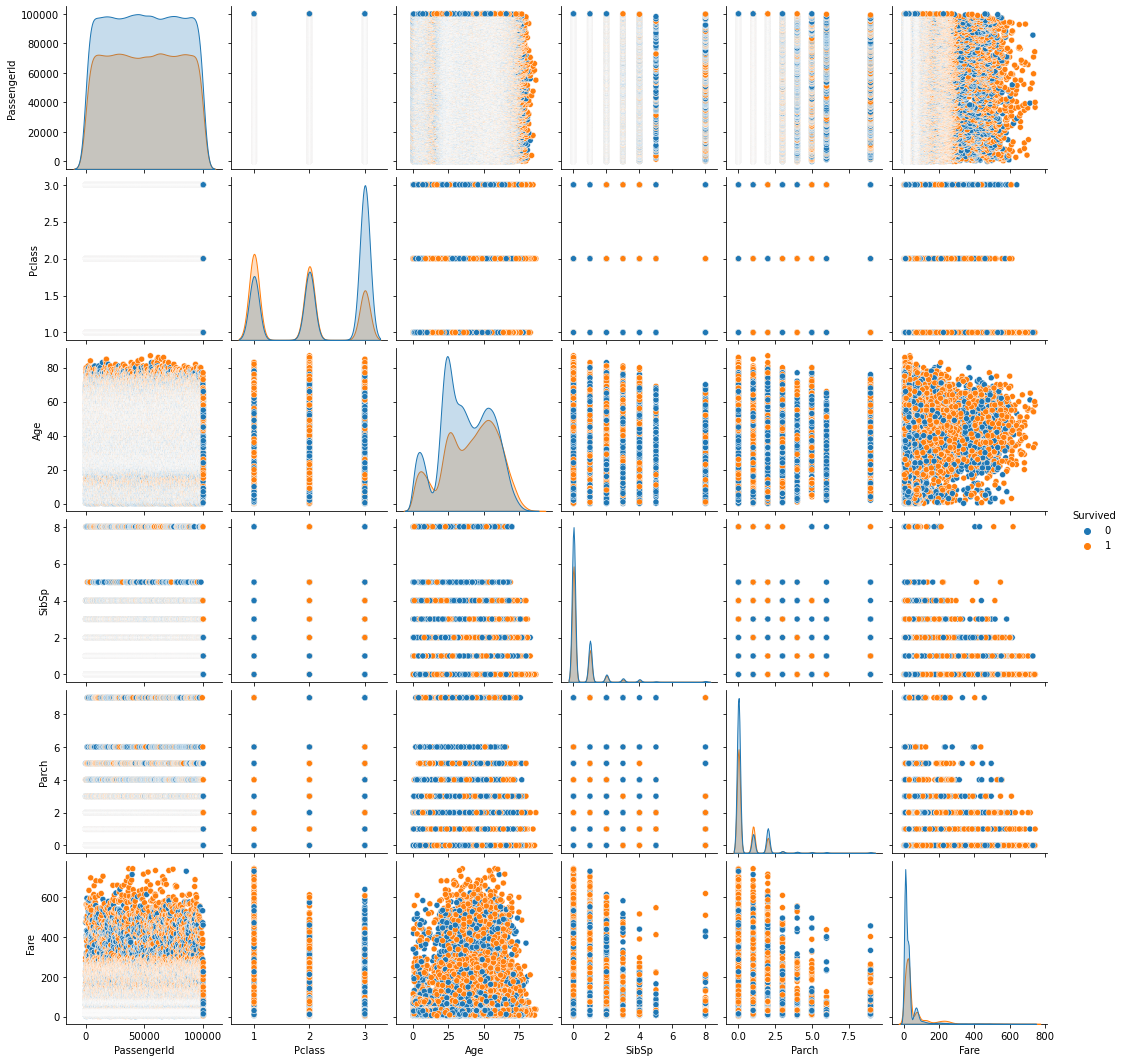

In [105]:
sns.pairplot(df_train, hue="Survived")